## Exploding gradient problem 
1. can be occured if our data is not rescaled or normalized as well as the output variable . So our derivates will have large values as our Z = wx + b is large due to unscaled data so we can reduce this effect by either using:
2. " clipnorm " or " clipvalue " arguments passed to the optimizor 

# pro Tip
We must ensure that the scale of our output variable matches the scale of the activation function (transfer function) on the output layer of your network. But it is generally better to choose an output activation function suited to the distribution of the targets than to force your data to conform to the output activation function.
1. create scaler
scaler = MinMaxScaler(feature_range=(-2,2)) scaling values between [-2,2] , scaler.inverse_transform() method is used to get back again the same data we've normalized . 



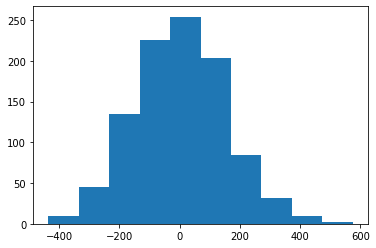

In [2]:
# mlp with unscaled data for the regression problem with gradient norm scaling
from sklearn.datasets import make_regression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

pyplot.hist(y)
pyplot.show()

In [6]:
X

array([[ 0.58372668,  0.78593639, -0.17187155, ..., -0.67945508,
        -0.21540618,  1.03118947],
       [ 1.83653535, -0.43975259,  1.21037099, ..., -0.61985144,
         0.03486214,  0.25276881],
       [-0.11618216,  0.3388232 , -1.83238053, ...,  0.405313  ,
        -0.17124384,  0.63344087],
       ...,
       [-0.20438481, -0.24779751, -1.34917521, ...,  0.68959282,
        -0.22261241, -0.87523939],
       [-1.10841843, -0.13879159,  0.49688371, ...,  0.02526386,
         1.46310899,  1.74031001],
       [-1.27932054, -0.16484828,  0.62088008, ...,  2.63501865,
        -1.41961373, -0.23298524]])

### Without gradient cliping/norming

Train: nan, Test: nan


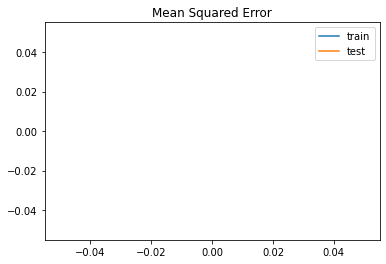

In [7]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Using clip norm
 the gradients can be rescaled to have a vector norm (magnitude or length) of 2.0, as follows

Train: 5.040, Test: 22.975


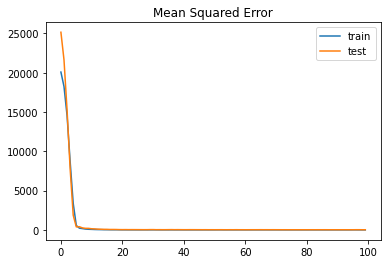

In [16]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9 , clipnorm = 2.0) # usually 1.0 is used
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Gradient value clipping
clipping the gradients between a range like [-5 , 5] if 5 is passed as argument

Train: 9.442, Test: 12.769


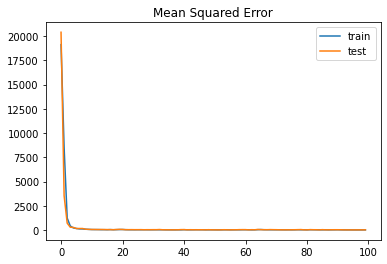

In [19]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(lr=0.01, momentum=0.9, clipvalue=1.0)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()